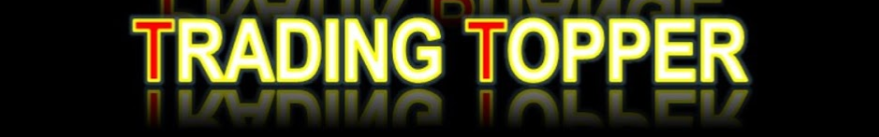

# ---------------- stock market price Prediction | 99% Accuracy----------------------

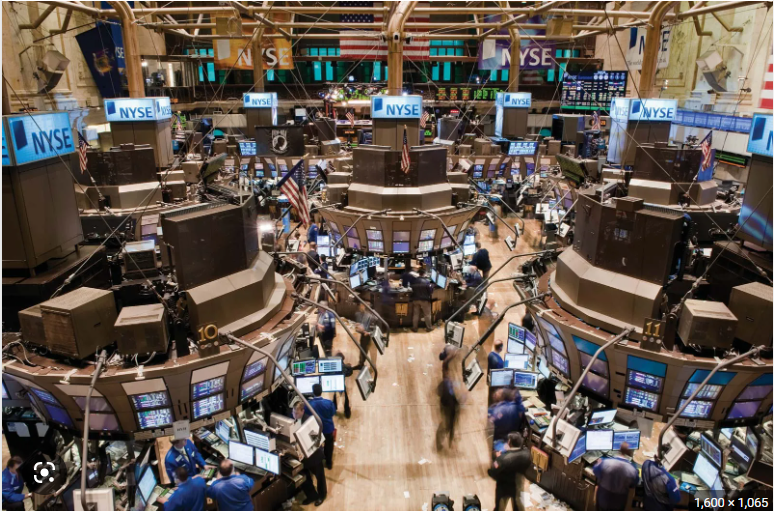

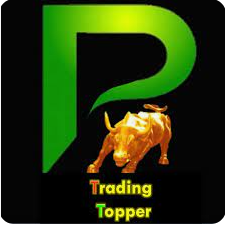

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\OFF-LAPTOP\Desktop\MM.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,M&M,EQ,419.75,453.30,453.35,448.90,453.35,453.35,453.18,67195,3.045174e+12,NaN,NaN,NaN
1,2000-01-04,M&M,EQ,453.35,489.60,489.65,489.60,489.65,489.65,489.65,37470,1.834710e+12,NaN,NaN,NaN
2,2000-01-05,M&M,EQ,489.65,528.85,528.85,451.15,519.00,514.85,521.37,227621,1.186745e+13,NaN,NaN,NaN
3,2000-01-06,M&M,EQ,514.85,528.00,550.00,518.00,521.00,524.55,538.27,198870,1.070456e+13,NaN,NaN,NaN
4,2000-01-07,M&M,EQ,524.55,515.00,522.00,490.00,498.90,496.40,508.09,91052,4.626258e+12,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [5]:
df =df.drop('Trades',axis=1)

In [6]:
df =df.drop('Deliverable Volume',axis=1)

In [7]:
df =df.drop('%Deliverble',axis=1)

In [8]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,M&M,EQ,419.75,453.30,453.35,448.90,453.35,453.35,453.18,67195,3.045174e+12
1,2000-01-04,M&M,EQ,453.35,489.60,489.65,489.60,489.65,489.65,489.65,37470,1.834710e+12
2,2000-01-05,M&M,EQ,489.65,528.85,528.85,451.15,519.00,514.85,521.37,227621,1.186745e+13
3,2000-01-06,M&M,EQ,514.85,528.00,550.00,518.00,521.00,524.55,538.27,198870,1.070456e+13
4,2000-01-07,M&M,EQ,524.55,515.00,522.00,490.00,498.90,496.40,508.09,91052,4.626258e+12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5306 non-null   object 
 1   Symbol      5306 non-null   object 
 2   Series      5306 non-null   object 
 3   Prev Close  5306 non-null   float64
 4   Open        5306 non-null   float64
 5   High        5306 non-null   float64
 6   Low         5306 non-null   float64
 7   Last        5306 non-null   float64
 8   Close       5306 non-null   float64
 9   VWAP        5306 non-null   float64
 10  Volume      5306 non-null   int64  
 11  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 497.6+ KB


In [10]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,686.809894,687.560253,698.206983,675.902092,686.834640,686.872616,687.237037,1.536694e+06,1.081240e+14
std,370.510148,370.722108,374.190683,366.901984,370.349299,370.493099,370.517209,1.833544e+06,1.266686e+14
min,51.800000,52.000000,53.350000,51.000000,51.600000,51.800000,52.040000,1.863000e+03,1.498941e+10
25%,451.487500,452.862500,462.125000,443.125000,451.050000,451.600000,452.902500,5.660968e+05,2.906433e+13
50%,678.475000,678.125000,690.950000,666.200000,678.725000,678.625000,678.180000,9.829985e+05,7.773717e+13
75%,900.912500,903.037500,915.575000,888.262500,901.100000,900.912500,902.242500,1.820870e+06,1.422915e+14
max,1556.300000,1560.000000,1571.400000,1533.100000,1550.400000,1556.300000,1557.090000,3.298648e+07,2.272217e+15


<AxesSubplot:>

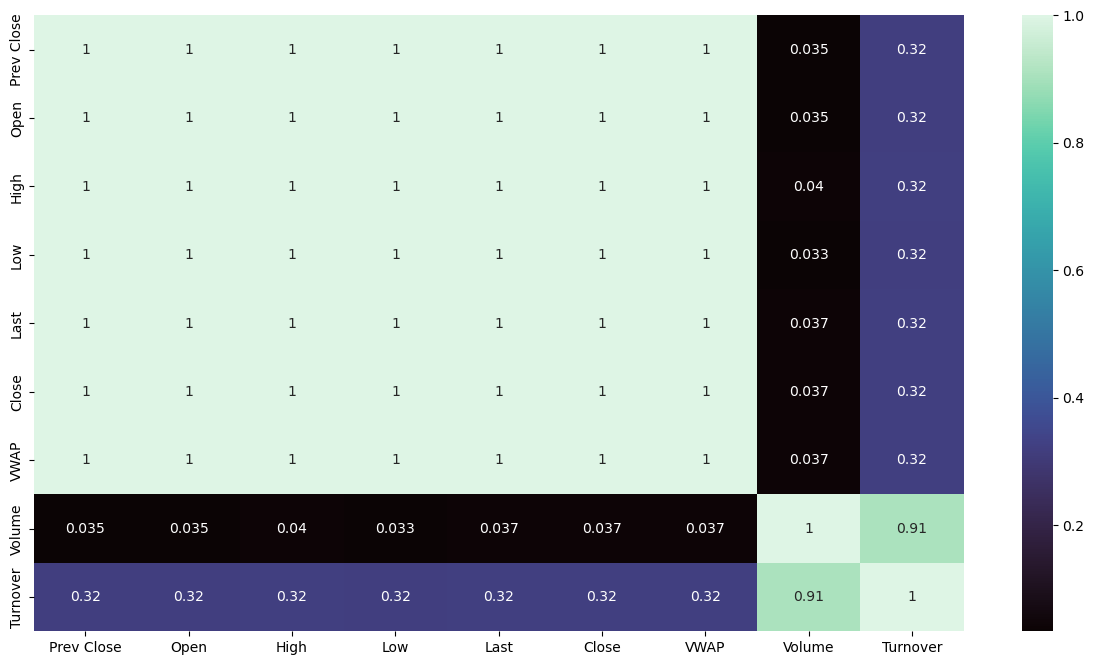

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True, cmap = "mako")

<AxesSubplot:xlabel='Volume', ylabel='Count'>

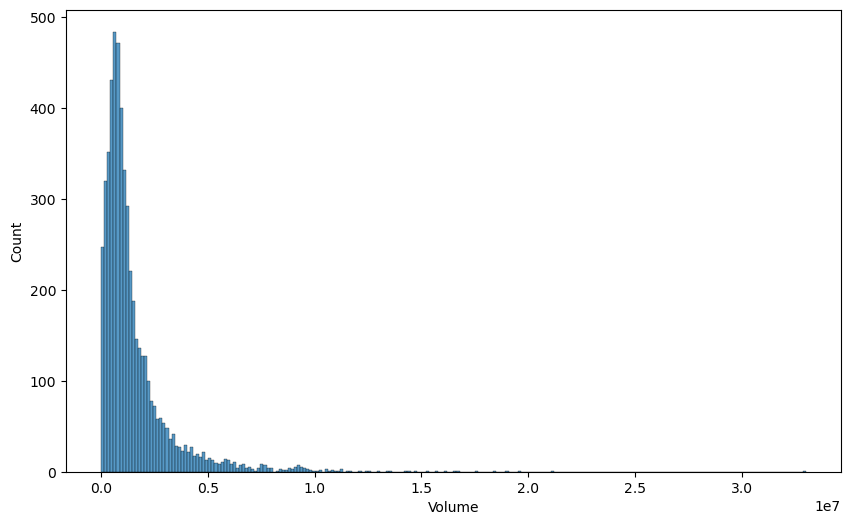

In [14]:
plt.figure(figsize=(10,6 ))
sns.histplot(df['Volume'])

<AxesSubplot:xlabel='Open', ylabel='Count'>

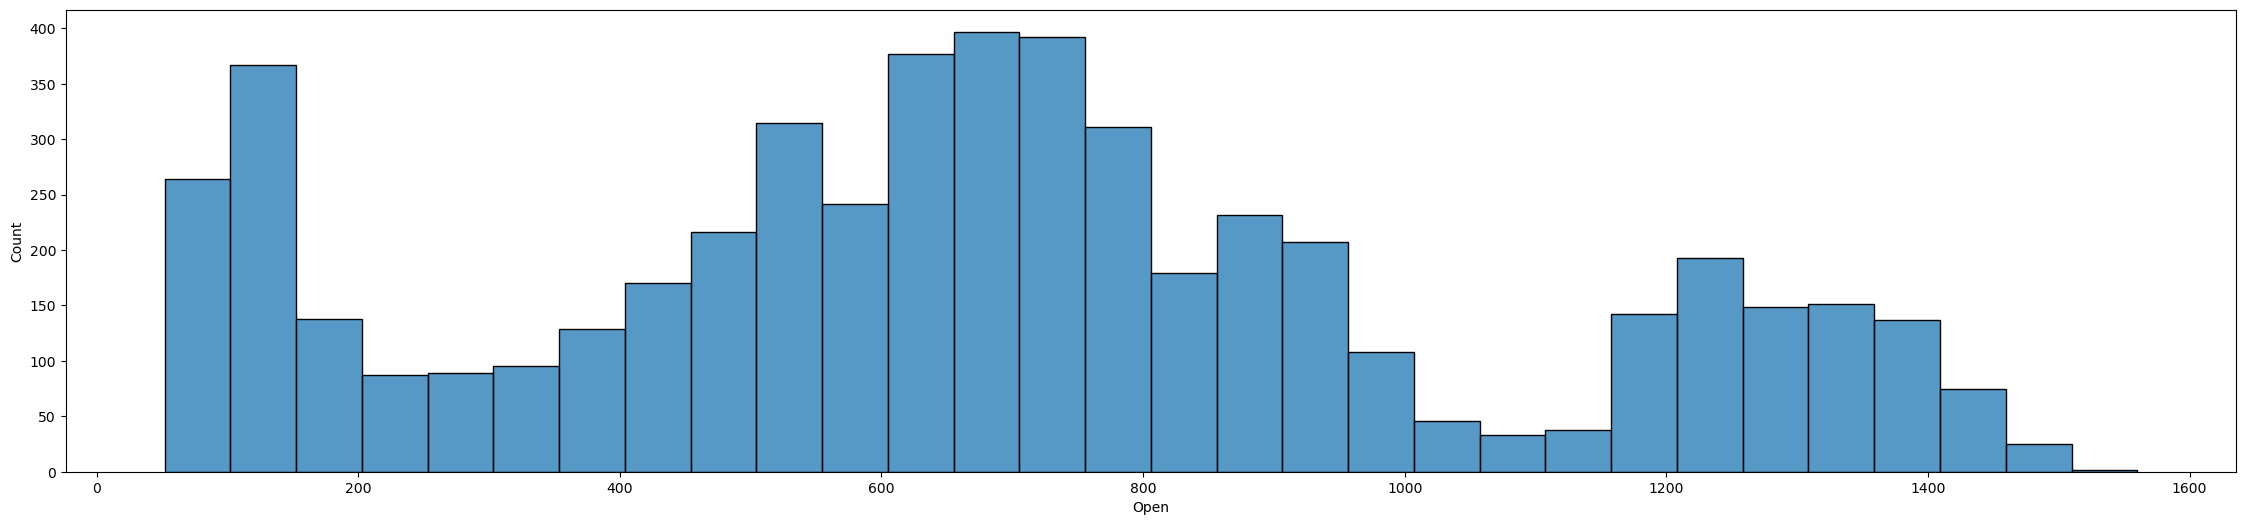

In [15]:
plt.figure(figsize=(28,6 ))
sns.histplot(df['Open'])

In [16]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')

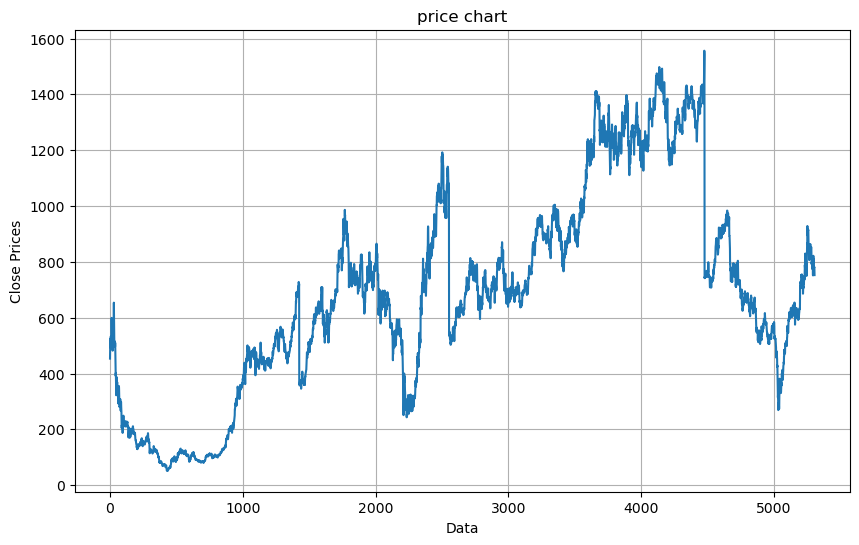

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Data')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('price chart')
plt.show()

<AxesSubplot:xlabel='VWAP', ylabel='Count'>

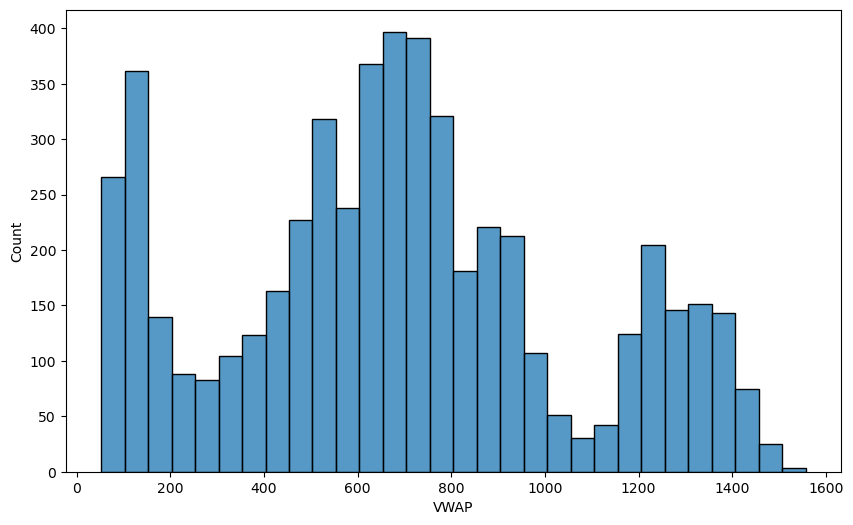

In [18]:
plt.figure(figsize=(10,6 ))
sns.histplot(df['VWAP'])

<AxesSubplot:xlabel='High', ylabel='Count'>

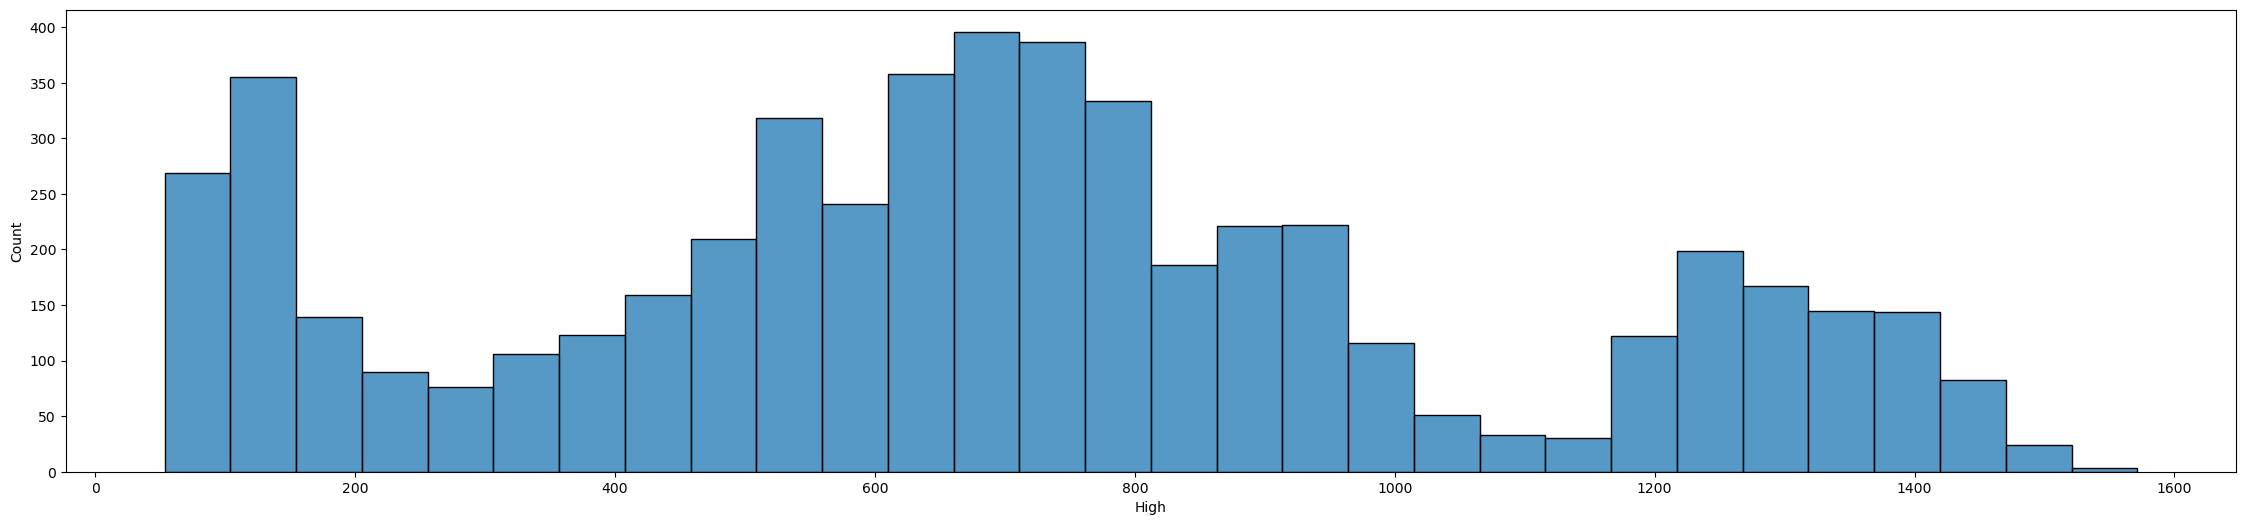

In [19]:
plt.figure(figsize=(28,6 ))
sns.histplot(df['High'])

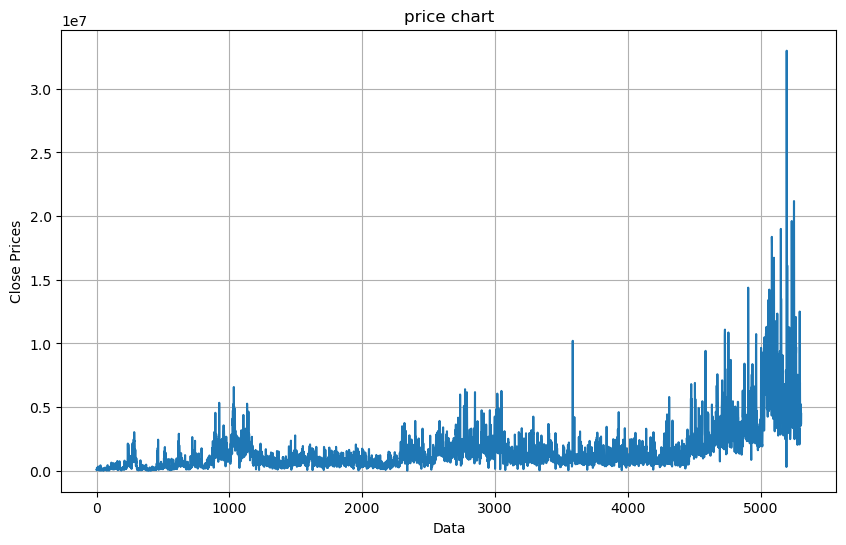

In [20]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Data')
plt.ylabel('Close Prices')
plt.plot(df['Volume'])
plt.title('price chart')
plt.show()

In [21]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Prev Close','Open','High','Low','Last','VWAP']]
X

,Prev Close,Open,High,Low,Last,VWAP
0,419.75,453.30,453.35,448.90,453.35,453.18
1,453.35,489.60,489.65,489.60,489.65,489.65
2,489.65,528.85,528.85,451.15,519.00,521.37
3,514.85,528.00,550.00,518.00,521.00,538.27
4,524.55,515.00,522.00,490.00,498.90,508.09
...,...,...,...,...,...,...
5301,777.90,780.00,793.30,775.65,779.80,782.35
5302,780.50,781.00,787.95,777.00,778.95,780.97
5303,778.40,786.00,801.60,778.85,780.50,791.37
5304,782.10,788.00,792.05,768.60,774.20,777.24


In [13]:
Y = df['Close']
Y

0       453.35
1       489.65
2       514.85
3       524.55
4       496.40
         ...  
5301    780.50
5302    778.40
5303    782.10
5304    774.60
5305    752.55
Name: Close, Length: 5306, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
LR = LinearRegression()

In [16]:
LR.fit(X_train, y_train)

LinearRegression()

In [17]:
Predict = LR.predict(X_test)


In [18]:
Predict

array([  98.62876714, 1208.47285489,  821.98283892, ...,  492.68633566,
        100.33659256, 1305.74621736])

In [19]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, Predict)
print("Accuracy:", accuracy)

Accuracy: 0.9999621851270054


In [20]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')

In [ ]:
print("enter price ")
c = int(input("Prev Close): "))
d = int(input("Open: "))

e = int(input("High"))
f = int(input("Low: "))
g = int(input("Last "))
h = int(input("VWAP"))
features = np.array([[c, d, e, f, g, h]])
print("PEICE: ", LR.predict(features))

enter price 


### VWAP